In [ ]:
from google.colab import files
hr = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
import pandas as pd
data = pd.read_csv("HR_comma_sep.csv")
df = pd.DataFrame(data)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
df_copy =df
ordinal_encoder = OrdinalEncoder(categories=[["low","medium","high"]])
df_copy["salary_Encoded"] = ordinal_encoder.fit_transform(df_copy[["salary"]])
print(df_copy[["salary","salary_Encoded"]])

onehot_encoder = OneHotEncoder()
encoded_data = onehot_encoder.fit_transform(df[["Department"]])

encoded_array = encoded_data.toarray()
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(["Department"]))
df_encoded = pd.concat([df_copy, encoded_df], axis=1)

df_encoded.drop("salary", axis=1, inplace=True)
df_encoded.drop("Department", axis=1, inplace=True)
df_encoded.head()

       salary  salary_Encoded
0         low             0.0
1      medium             1.0
2      medium             1.0
3         low             0.0
4         low             0.0
...       ...             ...
14994     low             0.0
14995     low             0.0
14996     low             0.0
14997     low             0.0
14998     low             0.0

[14999 rows x 2 columns]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_Encoded,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

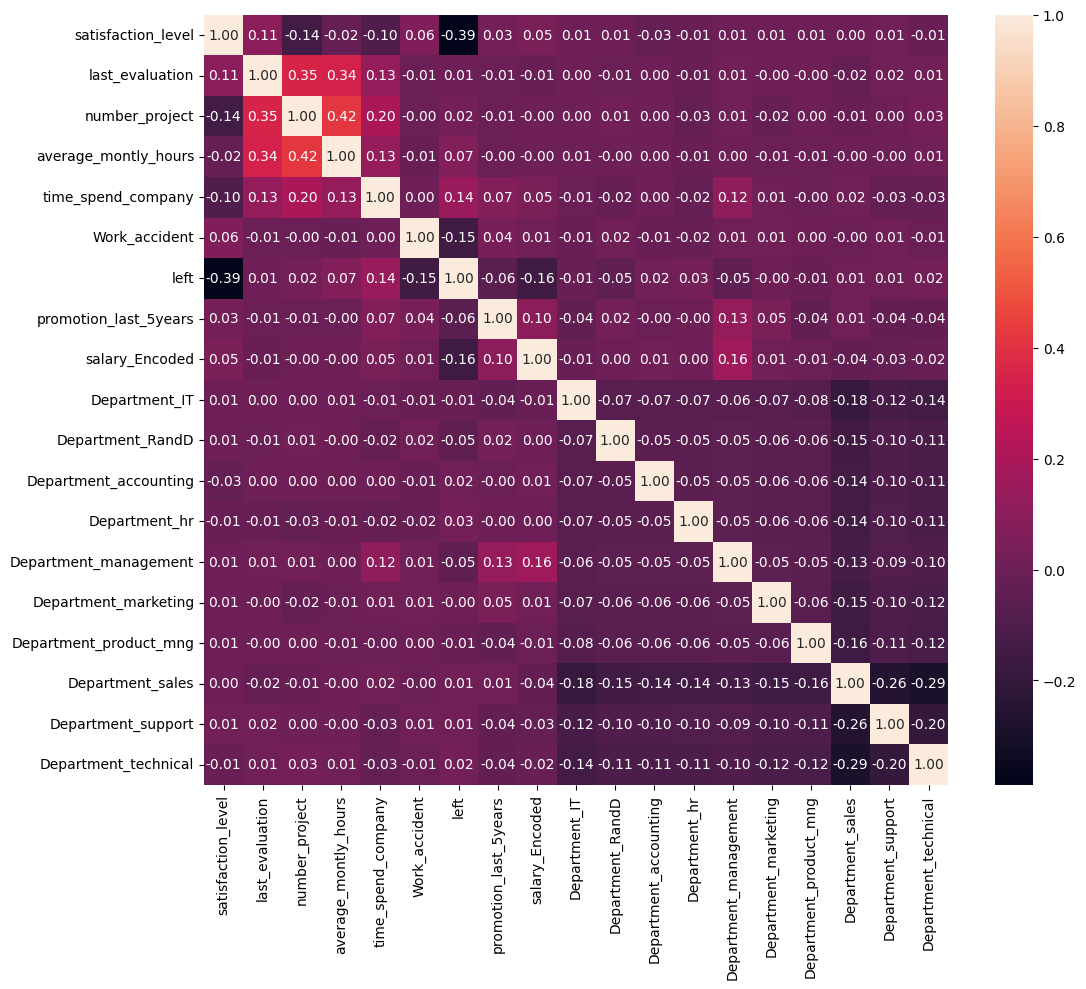

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(),annot=True,fmt="0.2f")

<Axes: xlabel='salary_Encoded', ylabel='left'>

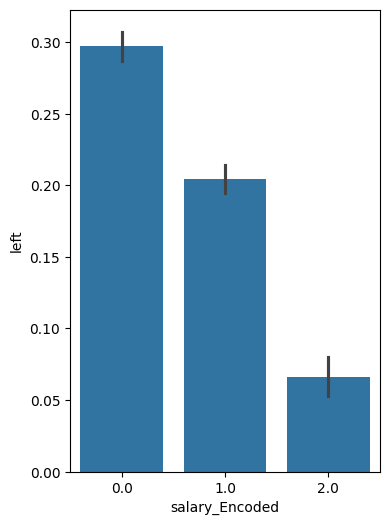

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x="salary_Encoded",y="left",data=df_encoded)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

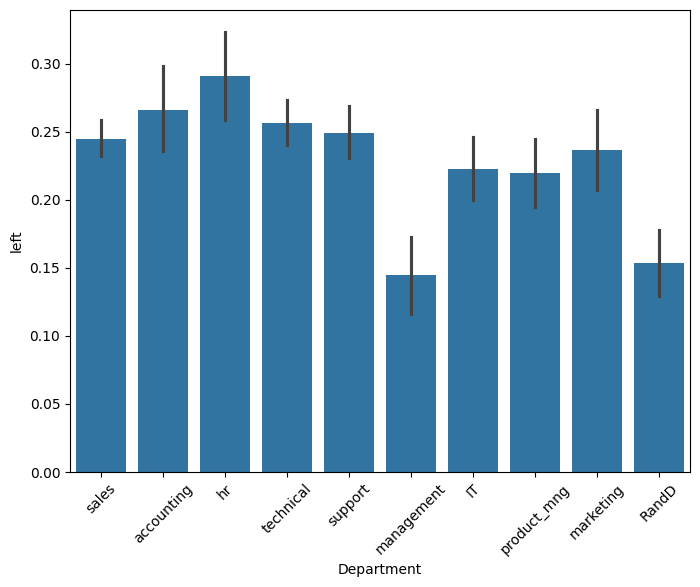

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Department",y="left",data=df)
plt.xticks(rotation=45)

In [ ]:
n_df = df_encoded[["number_project","average_montly_hours","time_spend_company","satisfaction_level","Work_accident","salary_Encoded"]]
n_df.head()

,number_project,average_montly_hours,time_spend_company,satisfaction_level,Work_accident,salary_Encoded
0,2,157,3,0.38,0,0.0
1,5,262,6,0.80,0,1.0
2,7,272,4,0.11,0,1.0
3,5,223,5,0.72,0,0.0
4,2,159,3,0.37,0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = n_df[["number_project", "average_montly_hours", "time_spend_company","satisfaction_level","Work_accident","salary_Encoded"]]
y = df_encoded["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 0.7856666666666666


In [ ]:
zoo = files.upload()

Saving zoo-data.csv to zoo-data.csv


In [ ]:
zoo1 =files.upload()

Saving zoo-class-type.csv to zoo-class-type.csv


In [ ]:
z = pd.read_csv("zoo-data.csv")
df1 = pd.DataFrame(z)
df1.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
z1 = pd.read_csv("zoo-class-type.csv")
df2 = pd.DataFrame(z1)
df2.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [ ]:
df1.isnull().sum()


,0
animal_name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [ ]:
df2.isnull().sum()

,0
Class_Number,0
Number_Of_Animal_Species_In_Class,0
Class_Type,0
Animal_Names,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

merged_data = pd.merge(df1,df2, left_on='class_type', right_on='Class_Number')

merged_data = merged_data.drop(['Animal_Names', 'Number_Of_Animal_Species_In_Class', 'Class_Number','class_type'], axis=1)


X = merged_data.drop('Class_Type', axis=1)
y = merged_data['Class_Type']
print(merged_data.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

  Class_Type  
0     Mammal  
1     Mammal  
2       Fish  
3     Ma

In [ ]:
merged_data = merged_data.drop(["animal_name"],axis=1)
merged_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal


In [ ]:
y = merged_data["Class_Type"]
X = merged_data.drop("Class_Type",axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9523809523809523


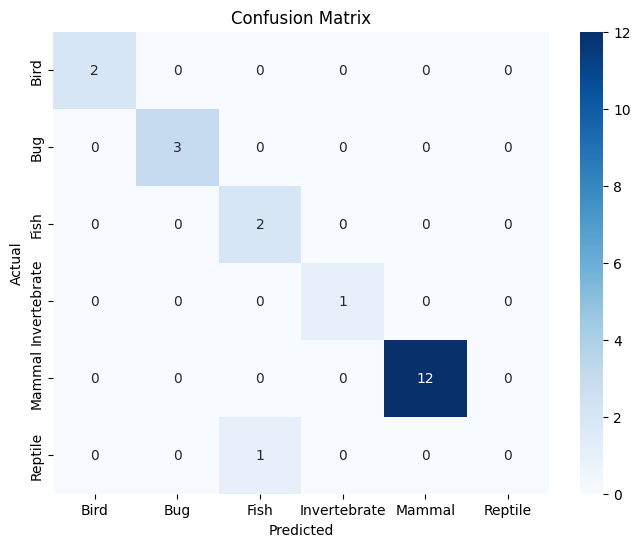

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
